In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [1]:
def f(x):
    return x * (x - 1) * (x + 1)

In [3]:
def fibonacci_search(f, a, b, n, eps=1e-5):

    phi = (1 + np.sqrt(5)) / 2
    s = (1 - np.sqrt(5)) / (1 + np.sqrt(5))
    rho = 1 / (phi * (1 - s**(n + 1)) / (1 - s**n))
    
    d = rho * (b - a) + a
    yd = f(d)
    
    for i in range(n):
        
        if i == n - 1:
            c = eps * a + (1 - eps) * d
        else:
            c = b - rho * (b - a)
        
        yc = f(c)
        
        if yc < yd:
            b, d, yd = d, c, yc
        else:
            a, b = b, c
        
        rho = 1/ (phi * (1 - s**(n - i + 1)) / (1 - s**(n - i)))
    
    return (a, b) if a < b else (b, a)

In [5]:
def plot_method(function, method, title, values=np.arange(-1.5, 1.5, 0.001), figsize=(15, 10), **method_kwargs):    
    fig, ax = plt.subplots()
    fig.set_size_inches(*figsize)

    ax.plot(values, function(values), color='k')
    if callable(method):
        tic = time.time()
        for candidate in method(function, **method_kwargs):
            ax.plot(candidate, function(candidate), marker='x', markersize=15)
        toc = time.time()
        print(f"[INFO] Estimated time: {toc - tic:.6f} sec")
    else:
        ax.plot(method, function(method), marker='x', markersize=15)
        
    ax.set_ylim([-1.0, 1.0])
    ax.set_title(title)
    
    plt.show()

[INFO] Estimated time: 0.001943 sec


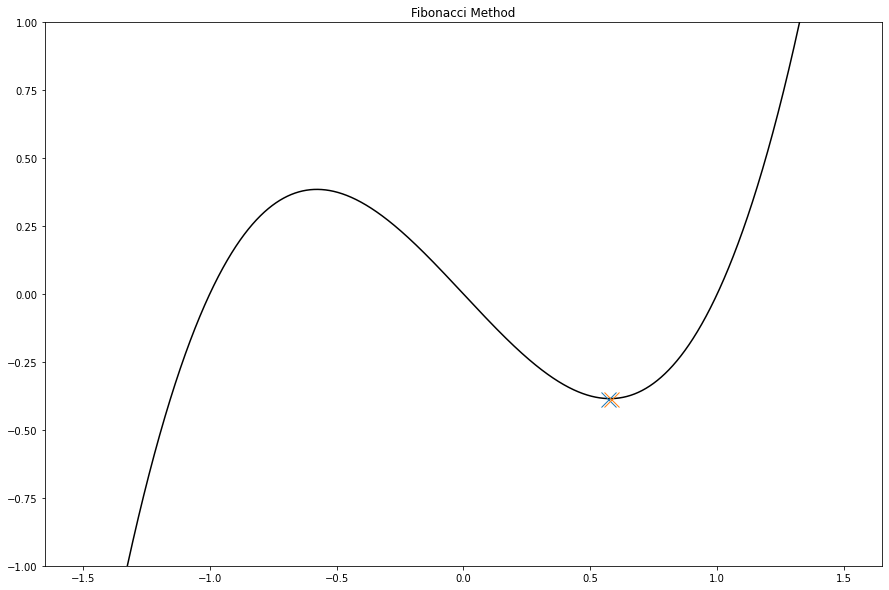

In [6]:
plot_method(f, fibonacci_search, "Fibonacci Method", a=-1., b=1., n=10)